In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터 프레임으로 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)

In [2]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf" # 폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

In [4]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [5]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

In [6]:
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

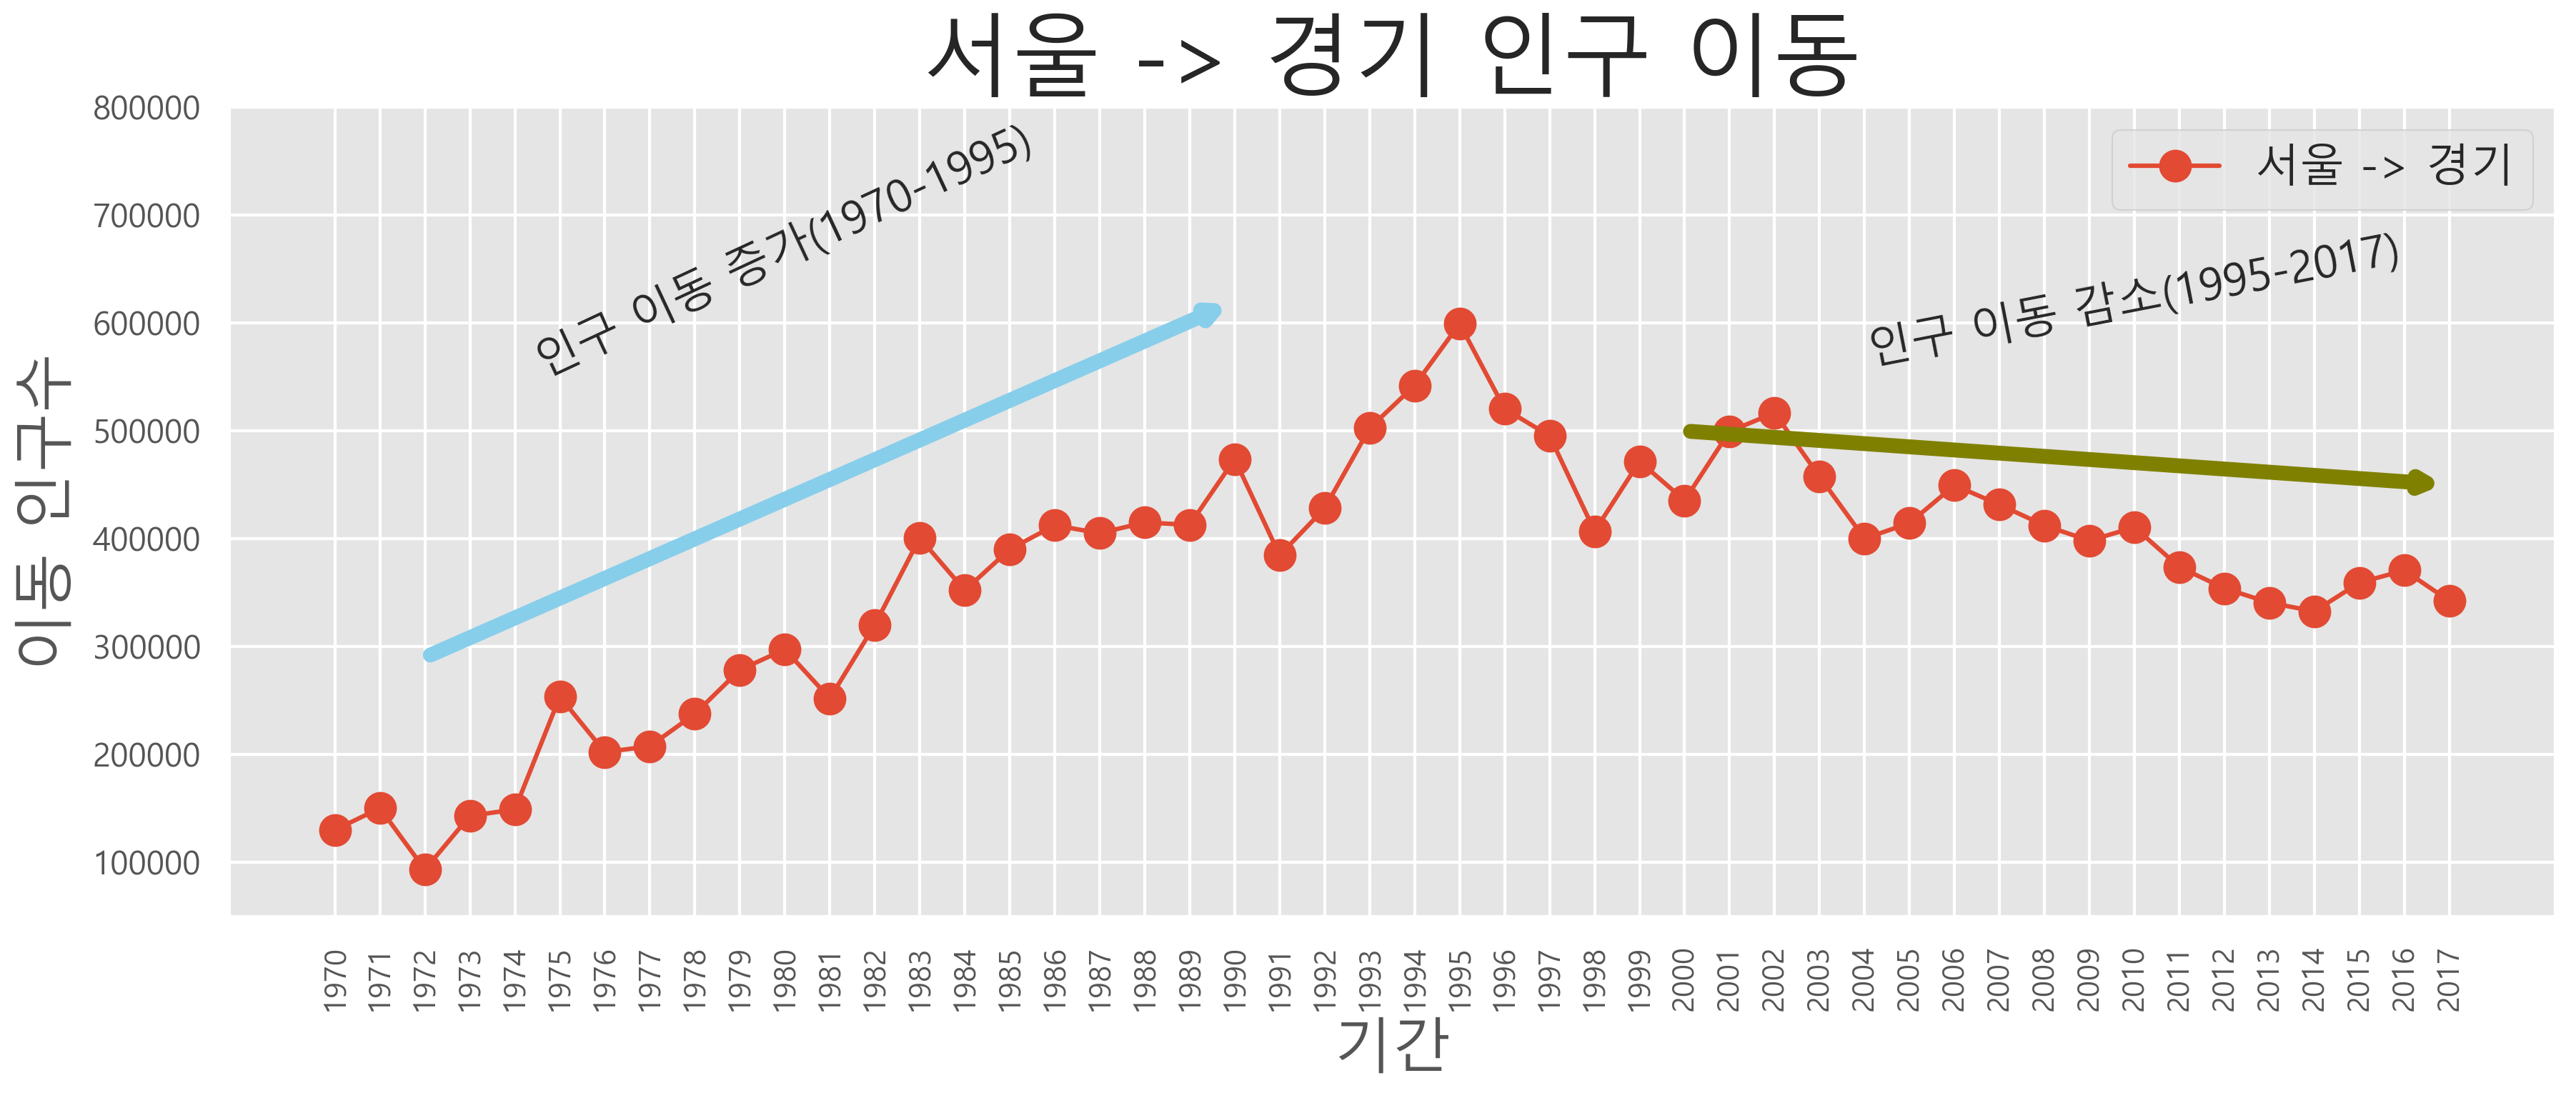

In [7]:
# 스타일 서식 지정
plt.style.use('ggplot')
# 그림사이즈 지정 (가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))
# x축 눈금 라벨 회전하기
plt.xticks(size='10',rotation='vertical')
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)
# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동', size=30)
# 축 이름 추가
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
# 범례 표시
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)
# y축 범위 지정(최소값, 최대값)
plt.ylim(50000, 800000)
# 주석 표시 - 화살표
plt.annotate('',
             xy=(20,620000),        # 화살표의 머리 부분(끝점)
             xytext=(2,290000),     # 화살표의 꼬리 부분(시작점)
             xycoords='data',       # 좌표체계
             arrowprops=dict(arrowstyle='->',color='skyblue',lw=5), # 화살표 서식
             )

plt.annotate('',
             xy=(47,450000),        # 화살표의 머리 부분(끝점)
             xytext=(30,500000),     # 화살표의 꼬리 부분(시작점)
             xycoords='data',       # 좌표체계
             arrowprops=dict(arrowstyle='->',color='olive',lw=5), # 화살표 서식
             )

# 주석 표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)',                            # 텍스트 입력
             xy=(10,550000),                                        # 텍스트 위치 기준점
             rotation=25,                                     # 텍스트 회전 각도
             va='baseline',                                       # 텍스트 상하 정렬
             ha='center',                                       # 텍스트 좌우 정렬
             fontsize=15,                                       # 텍스트 크기
             )

plt.annotate('인구 이동 감소(1995-2017)',                    # 텍스트 입력
             xy=(40, 560000),                               # 텍스트 위치 기준점
             rotation=11,                                   # 텍스트 회전 각도
             va='baseline',                                 # 텍스트 상하정렬
             ha='center',                                   # 텍스트 좌우 정렬
             fontsize=15,                                   # 텍스트 크기
            ) 

plt.show()      # 변경사항 저장하고 그래프 출력


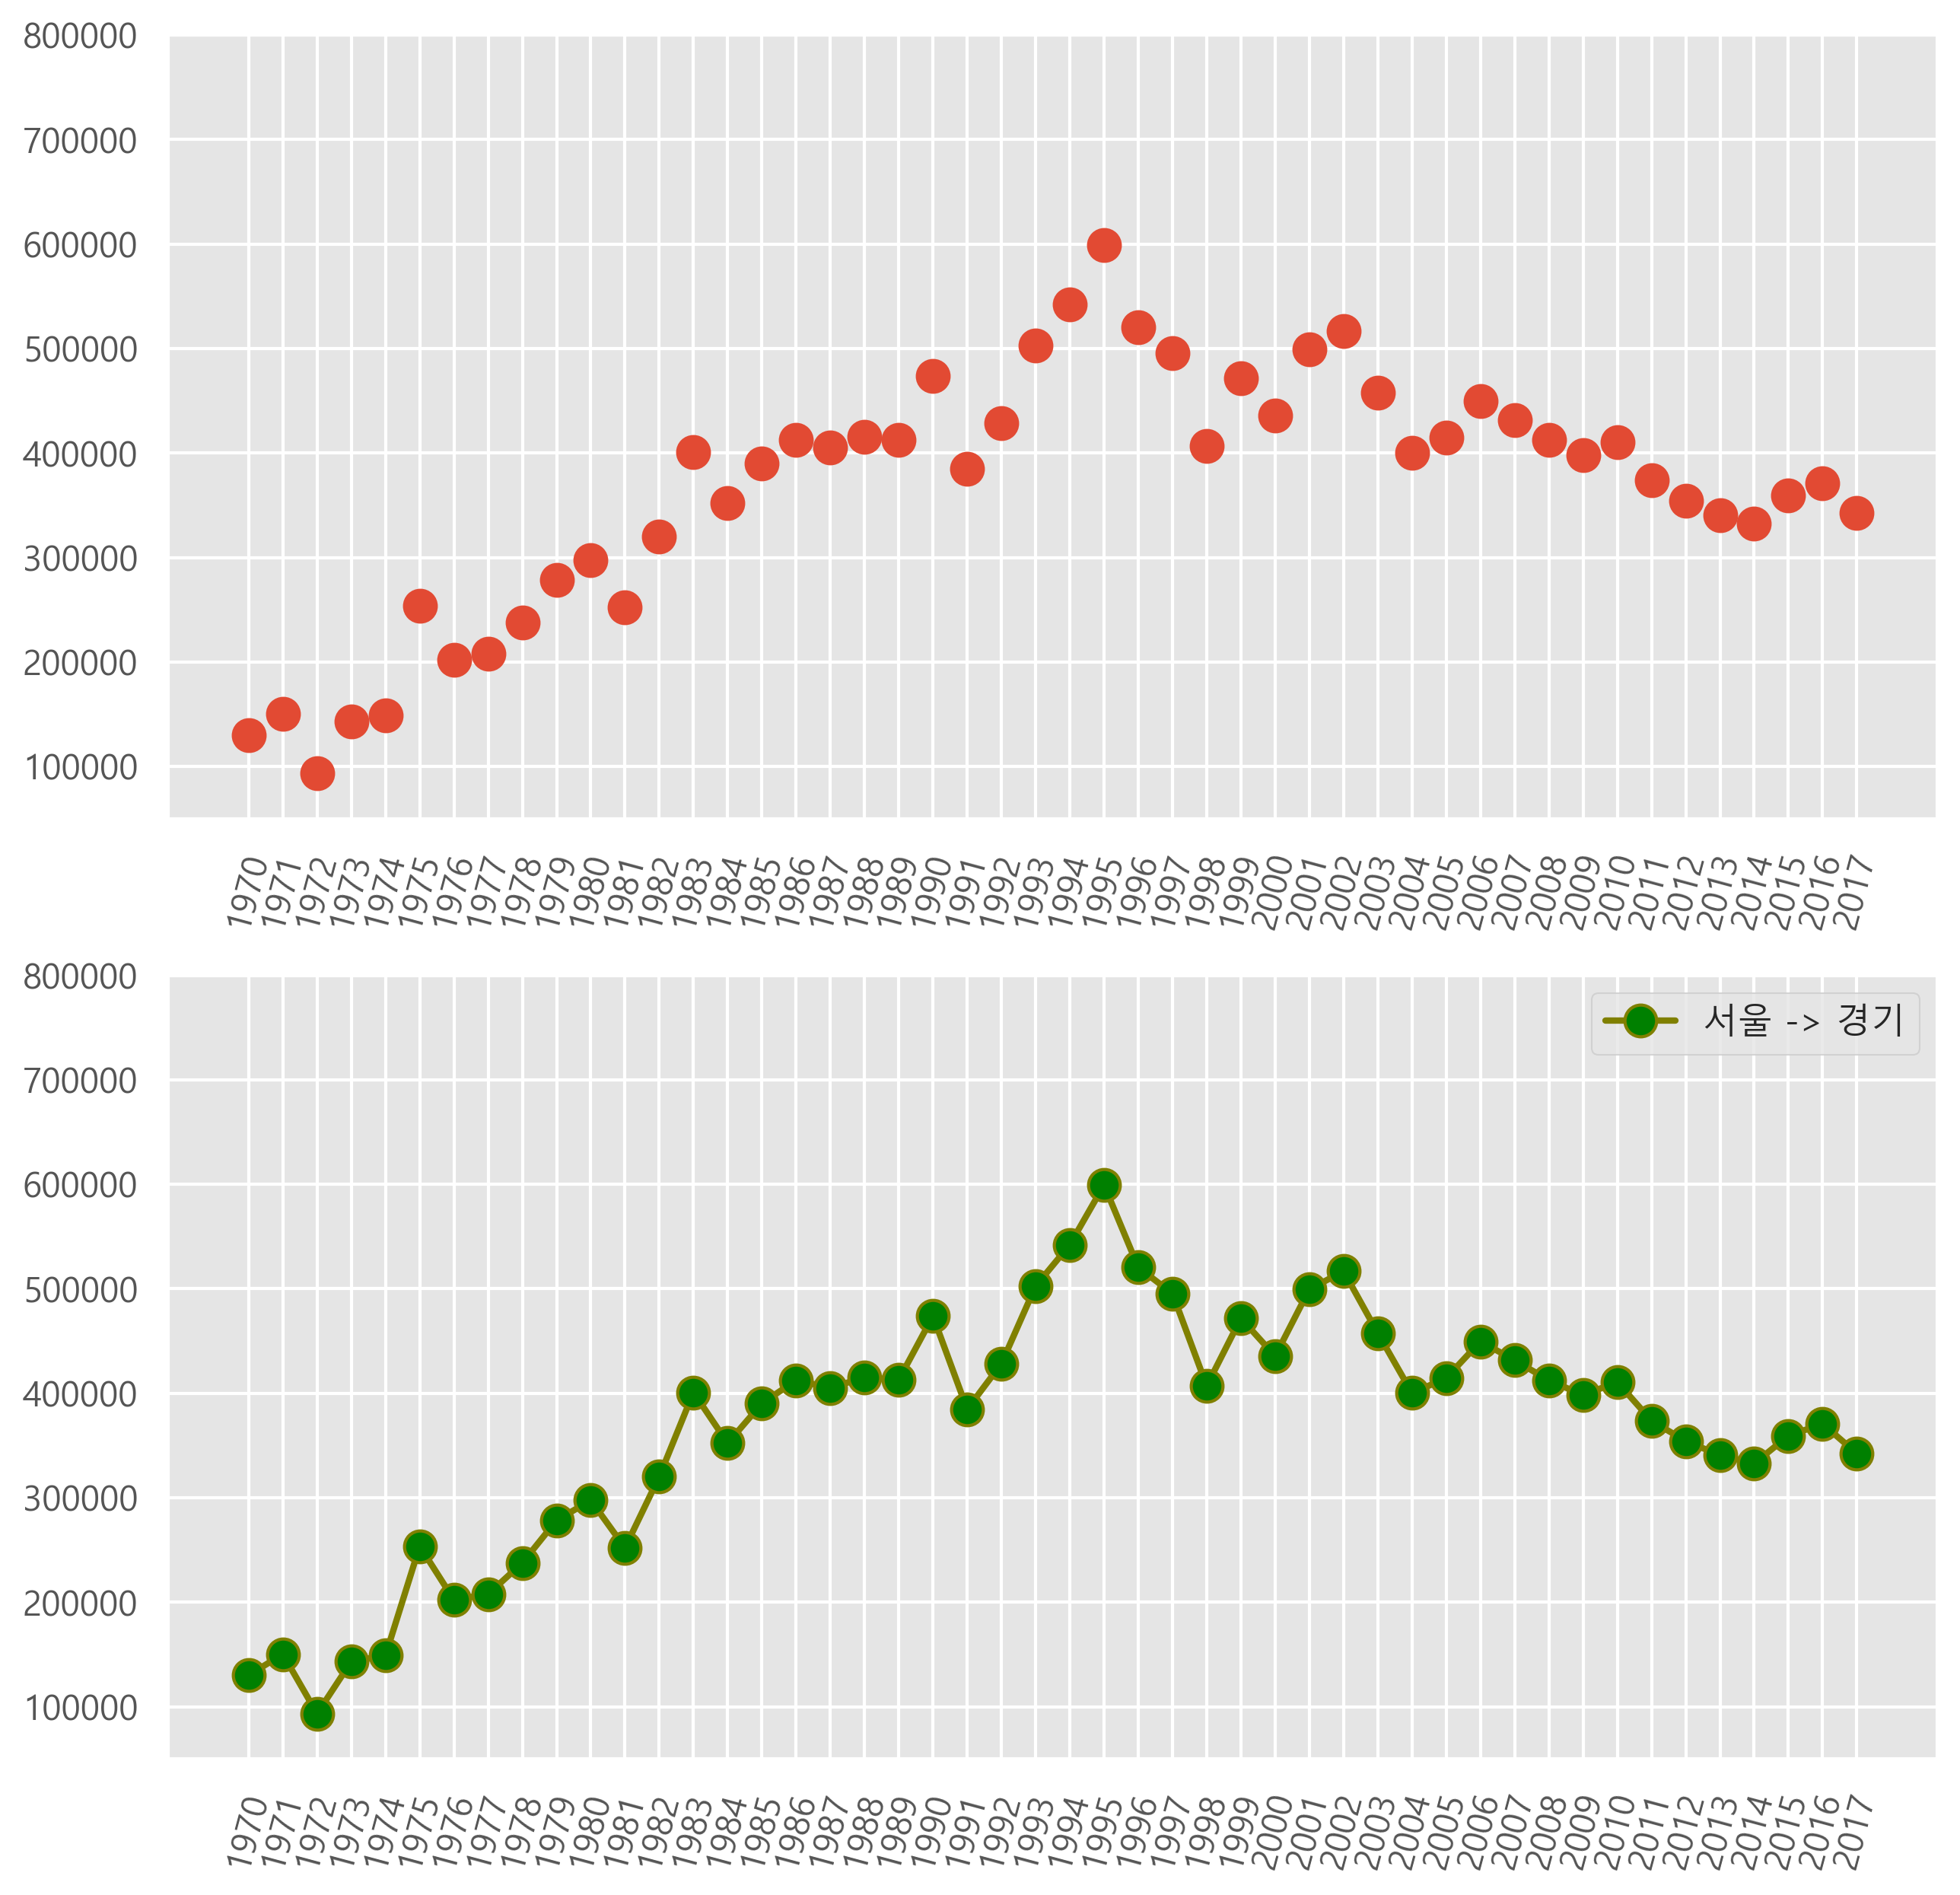

In [8]:
# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10,
         color='olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

# y축 범위 지정(최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()  # 변경 사항 저장하고 그래프 출력

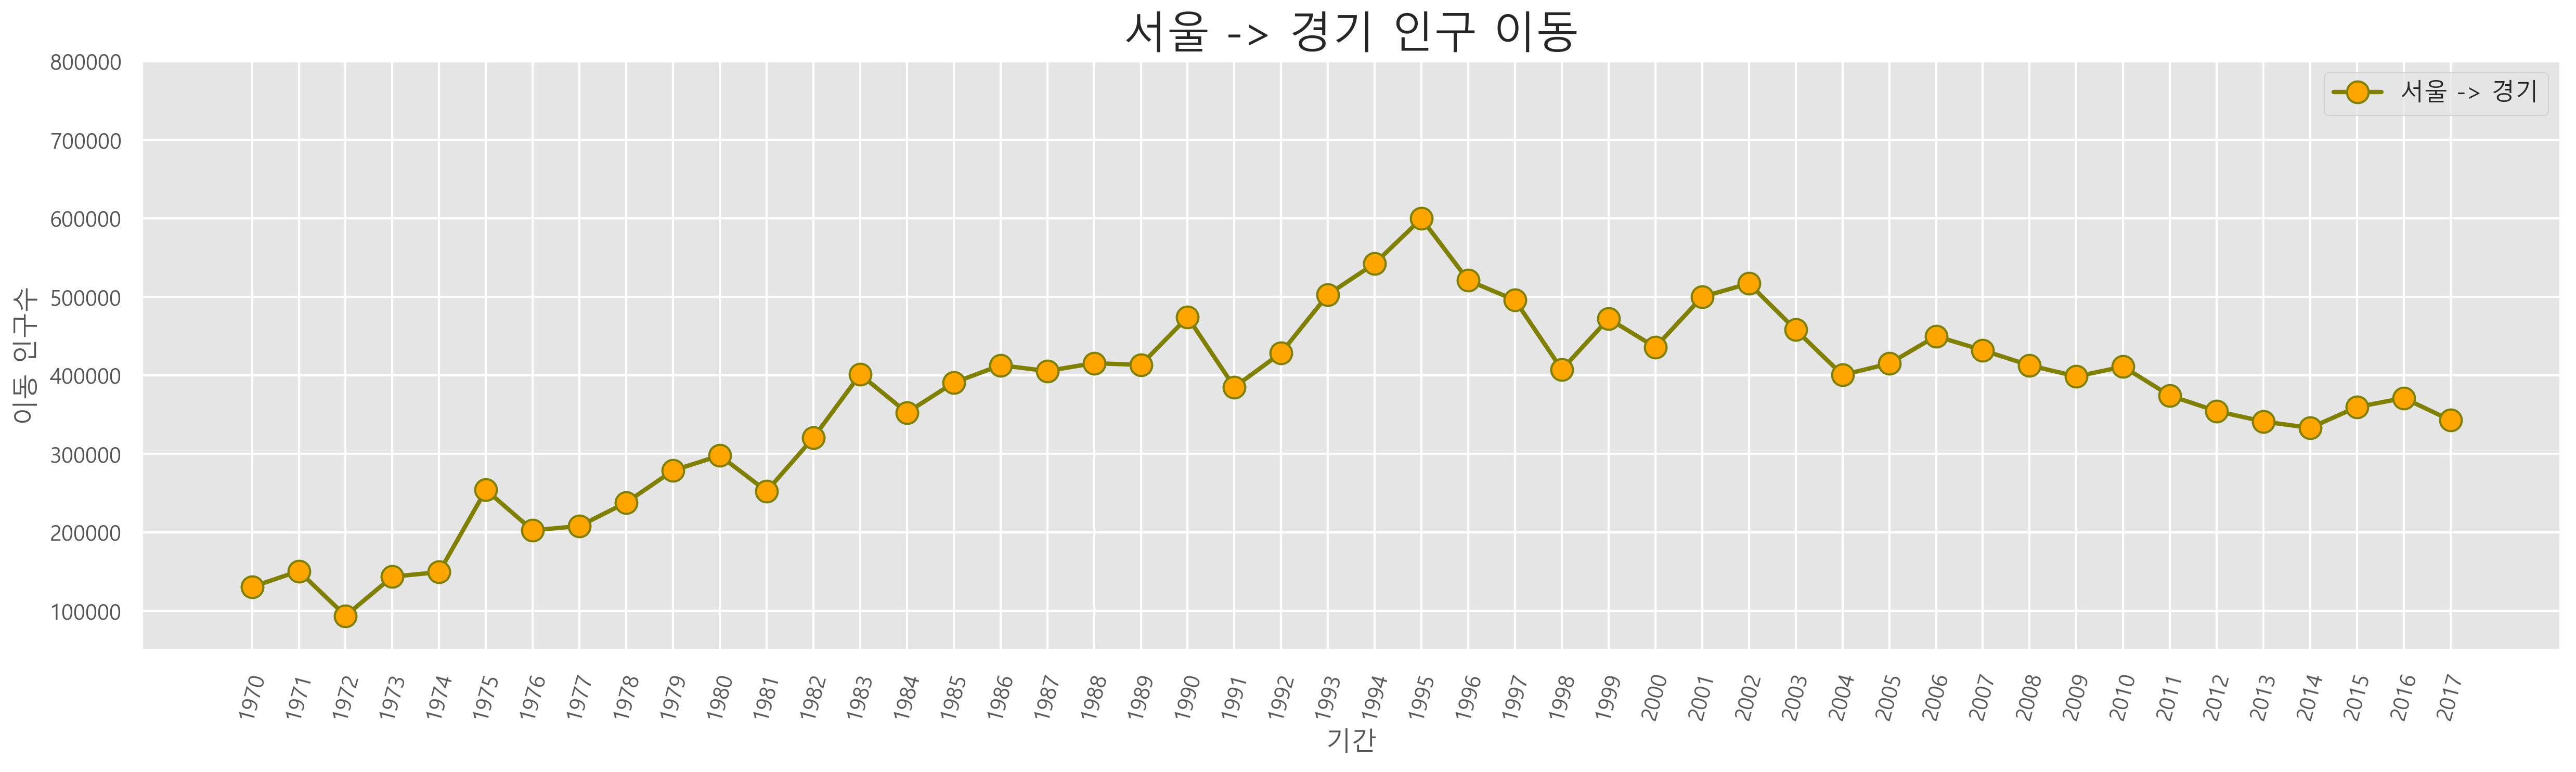

In [9]:
# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10,
        color='olive', linewidth=2, label='서울 -> 경기')
ax.legend(loc='best')

# y축 범위 지정 (최소값, 최대값)
ax.set_ylim(50000, 800000)

# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation=75)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()  # 변경사항 저장하고 그래프 출력

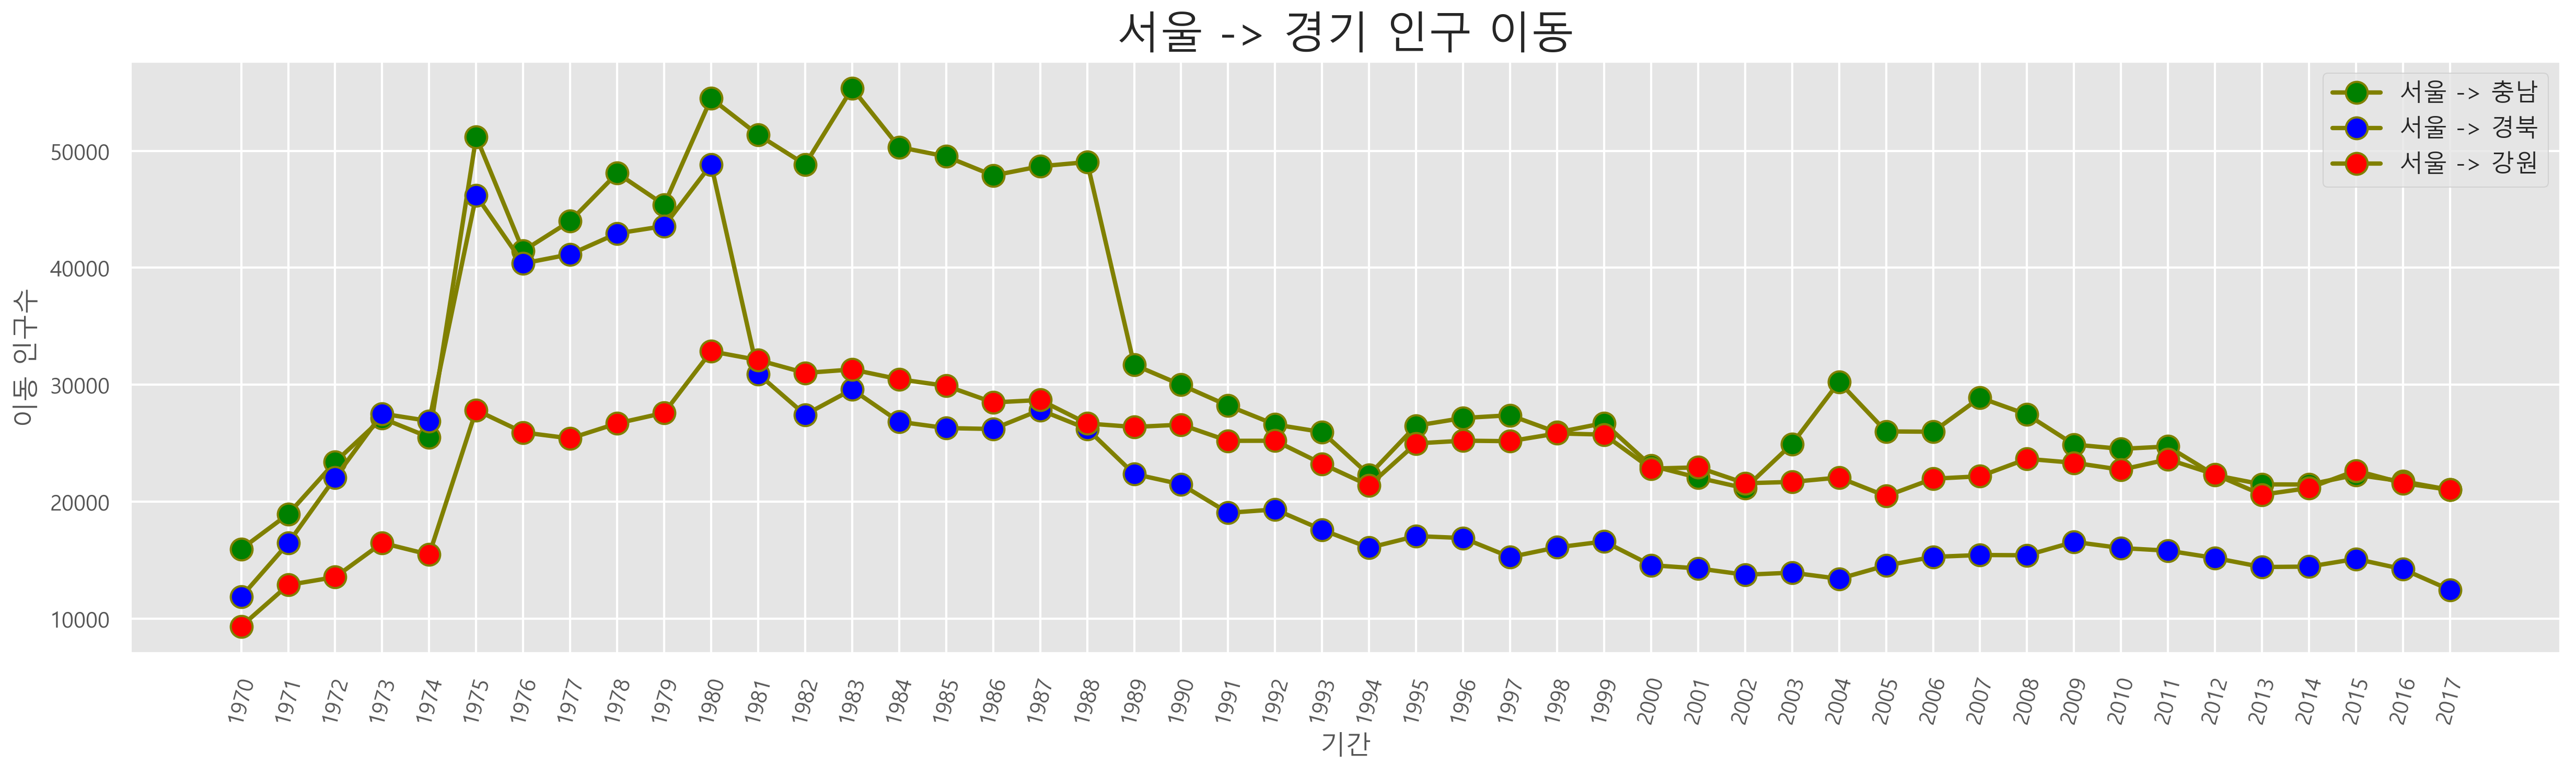

In [10]:
# 서울에서 '충청남도', '경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브플롯 생성)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years,df_3.loc['충청남도',:], marker='o', markerfacecolor='green', markersize=10,
        color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years,df_3.loc['경상북도',:], marker='o', markerfacecolor='blue', markersize=10,
        color='olive', linewidth=2, label='서울 -> 경북')
ax.plot(col_years,df_3.loc['강원도',:], marker='o', markerfacecolor='red', markersize=10,
        color='olive', linewidth=2, label='서울 -> 강원')
# 범례 표시
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation=75)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()  # 변경사항 저장하고 그래프 출력


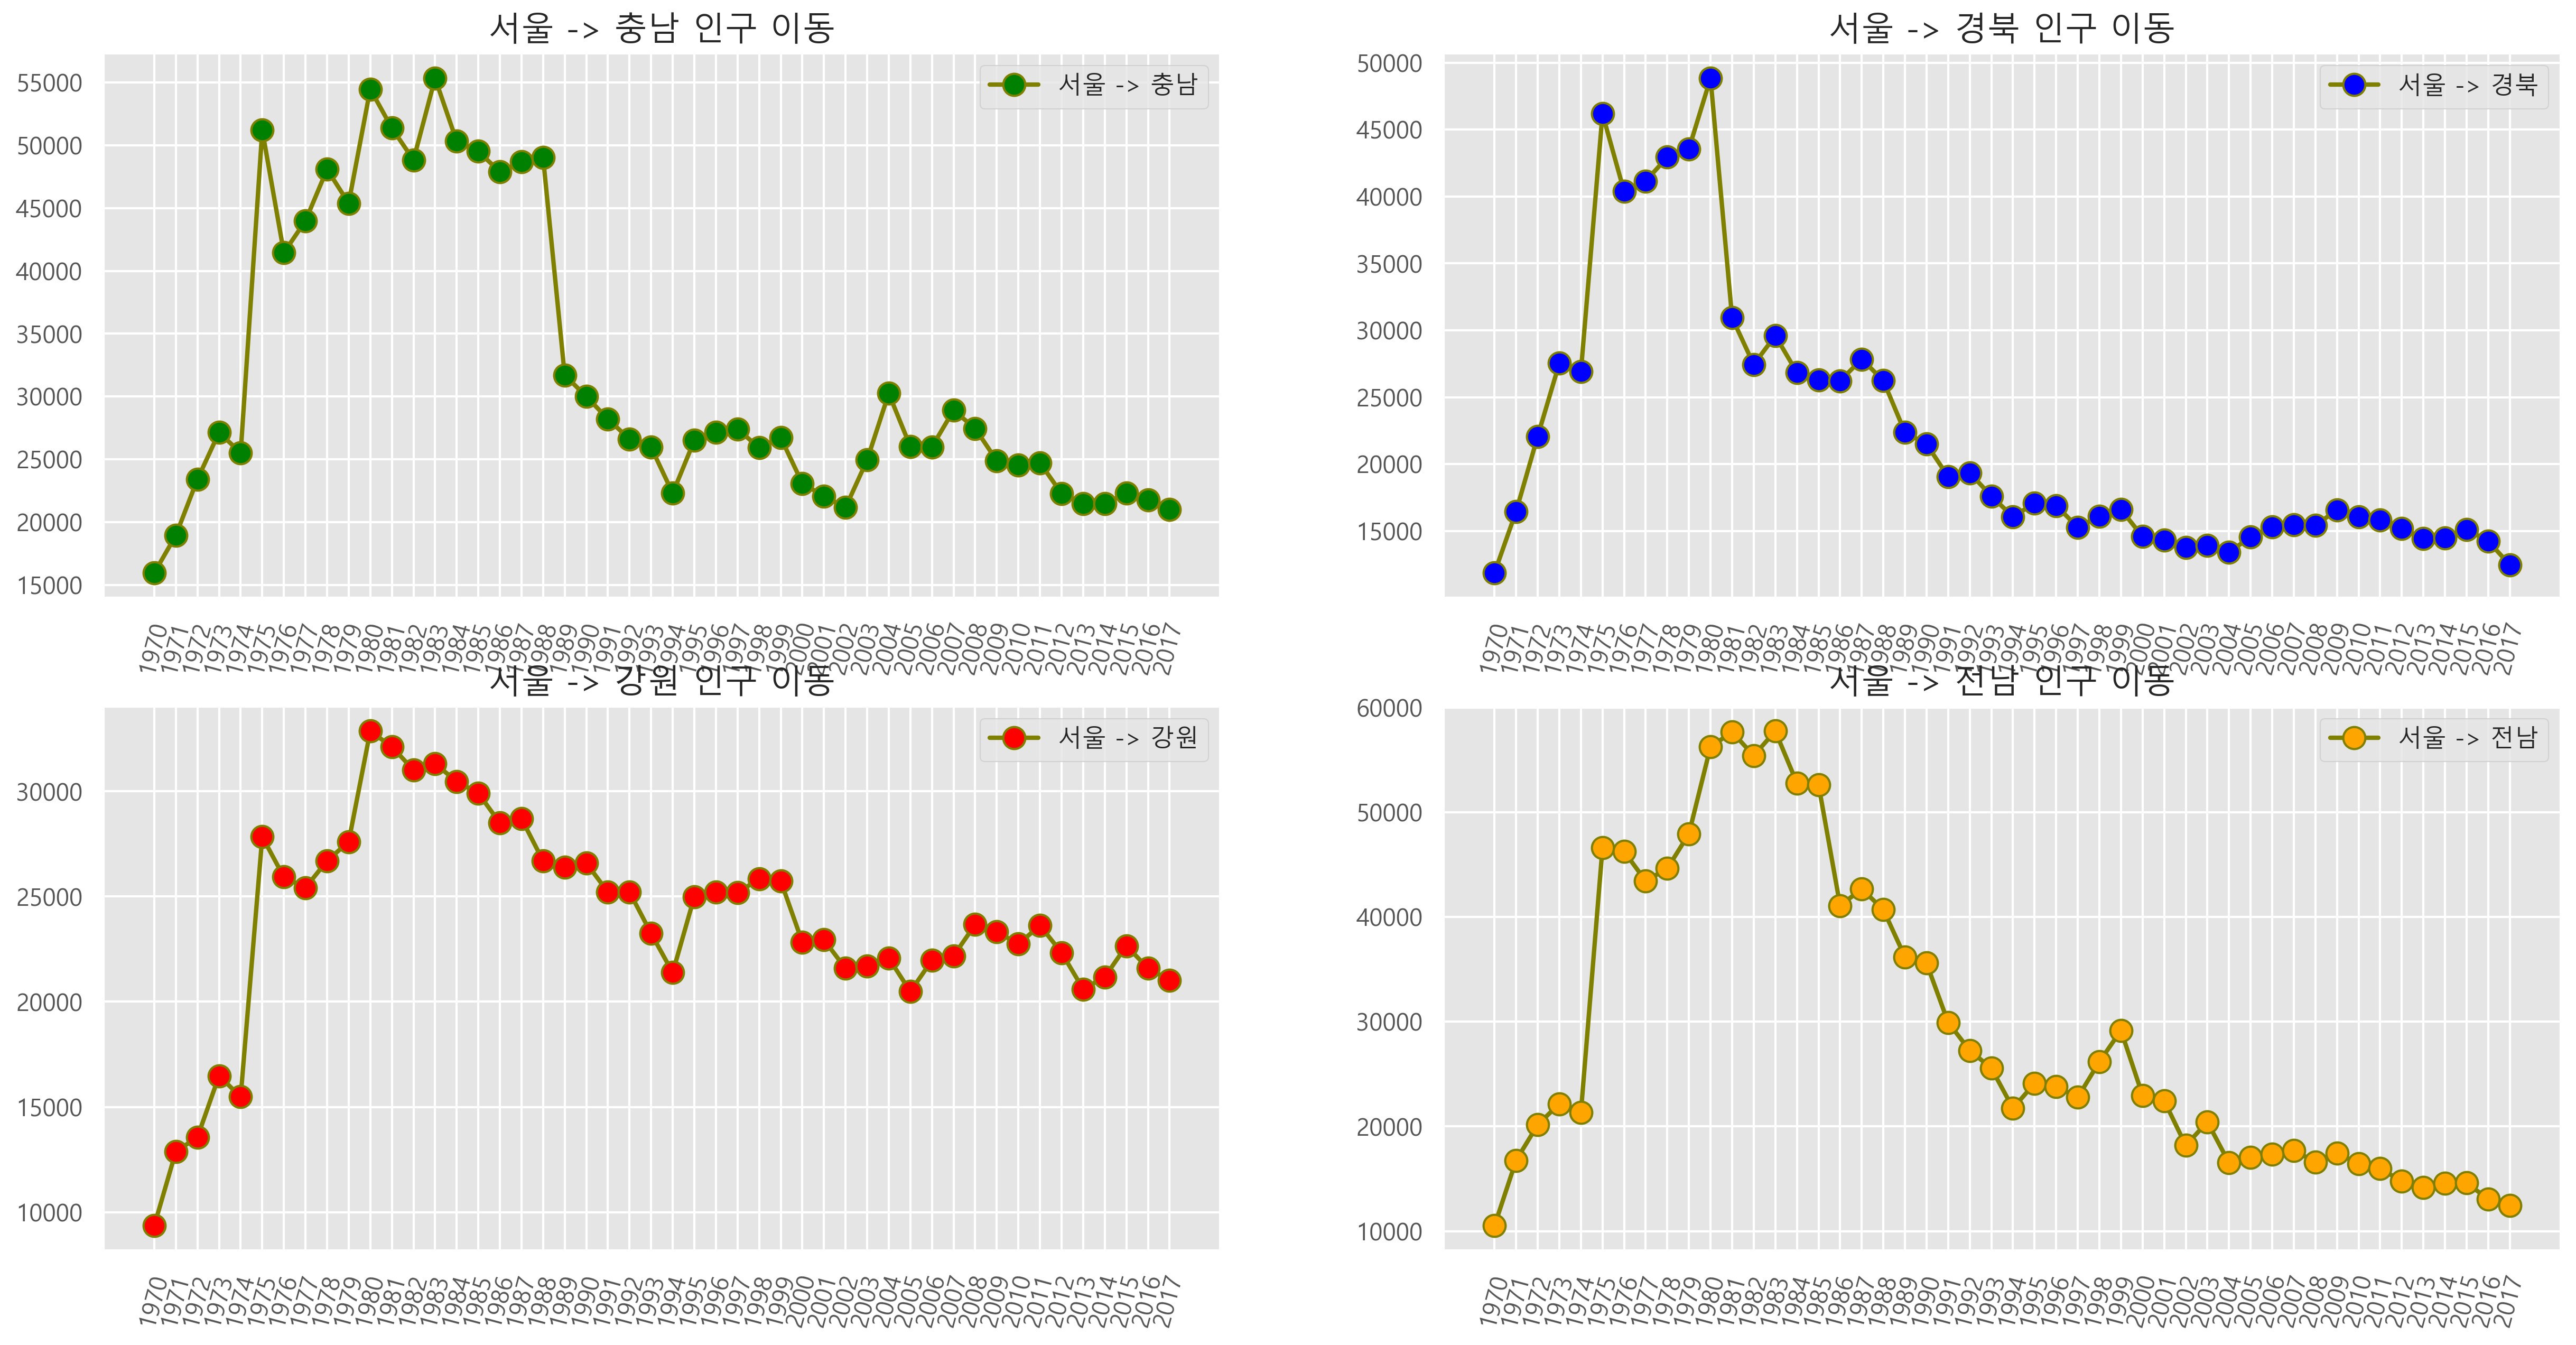

In [11]:
# 서울에서 '충청남도', '경상북도', '강원도', '전라남도' 로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도','전라남도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브플롯 생성)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(col_years,df_3.loc['충청남도',:], marker='o', markerfacecolor='green', markersize=10,
        color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years,df_3.loc['경상북도',:], marker='o', markerfacecolor='blue', markersize=10,
        color='olive', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years,df_3.loc['강원도',:], marker='o', markerfacecolor='red', markersize=10,
        color='olive', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years,df_3.loc['전라남도',:], marker='o', markerfacecolor='orange', markersize=10,
        color='olive', linewidth=2, label='서울 -> 전남')
# 범례 표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(col_years, rotation=75)
ax2.set_xticklabels(col_years, rotation=75)
ax3.set_xticklabels(col_years, rotation=75)
ax4.set_xticklabels(col_years, rotation=75)

plt.show()  # 변경사항 저장하고 그래프 출력

In [12]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [13]:
# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도','강원도','전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

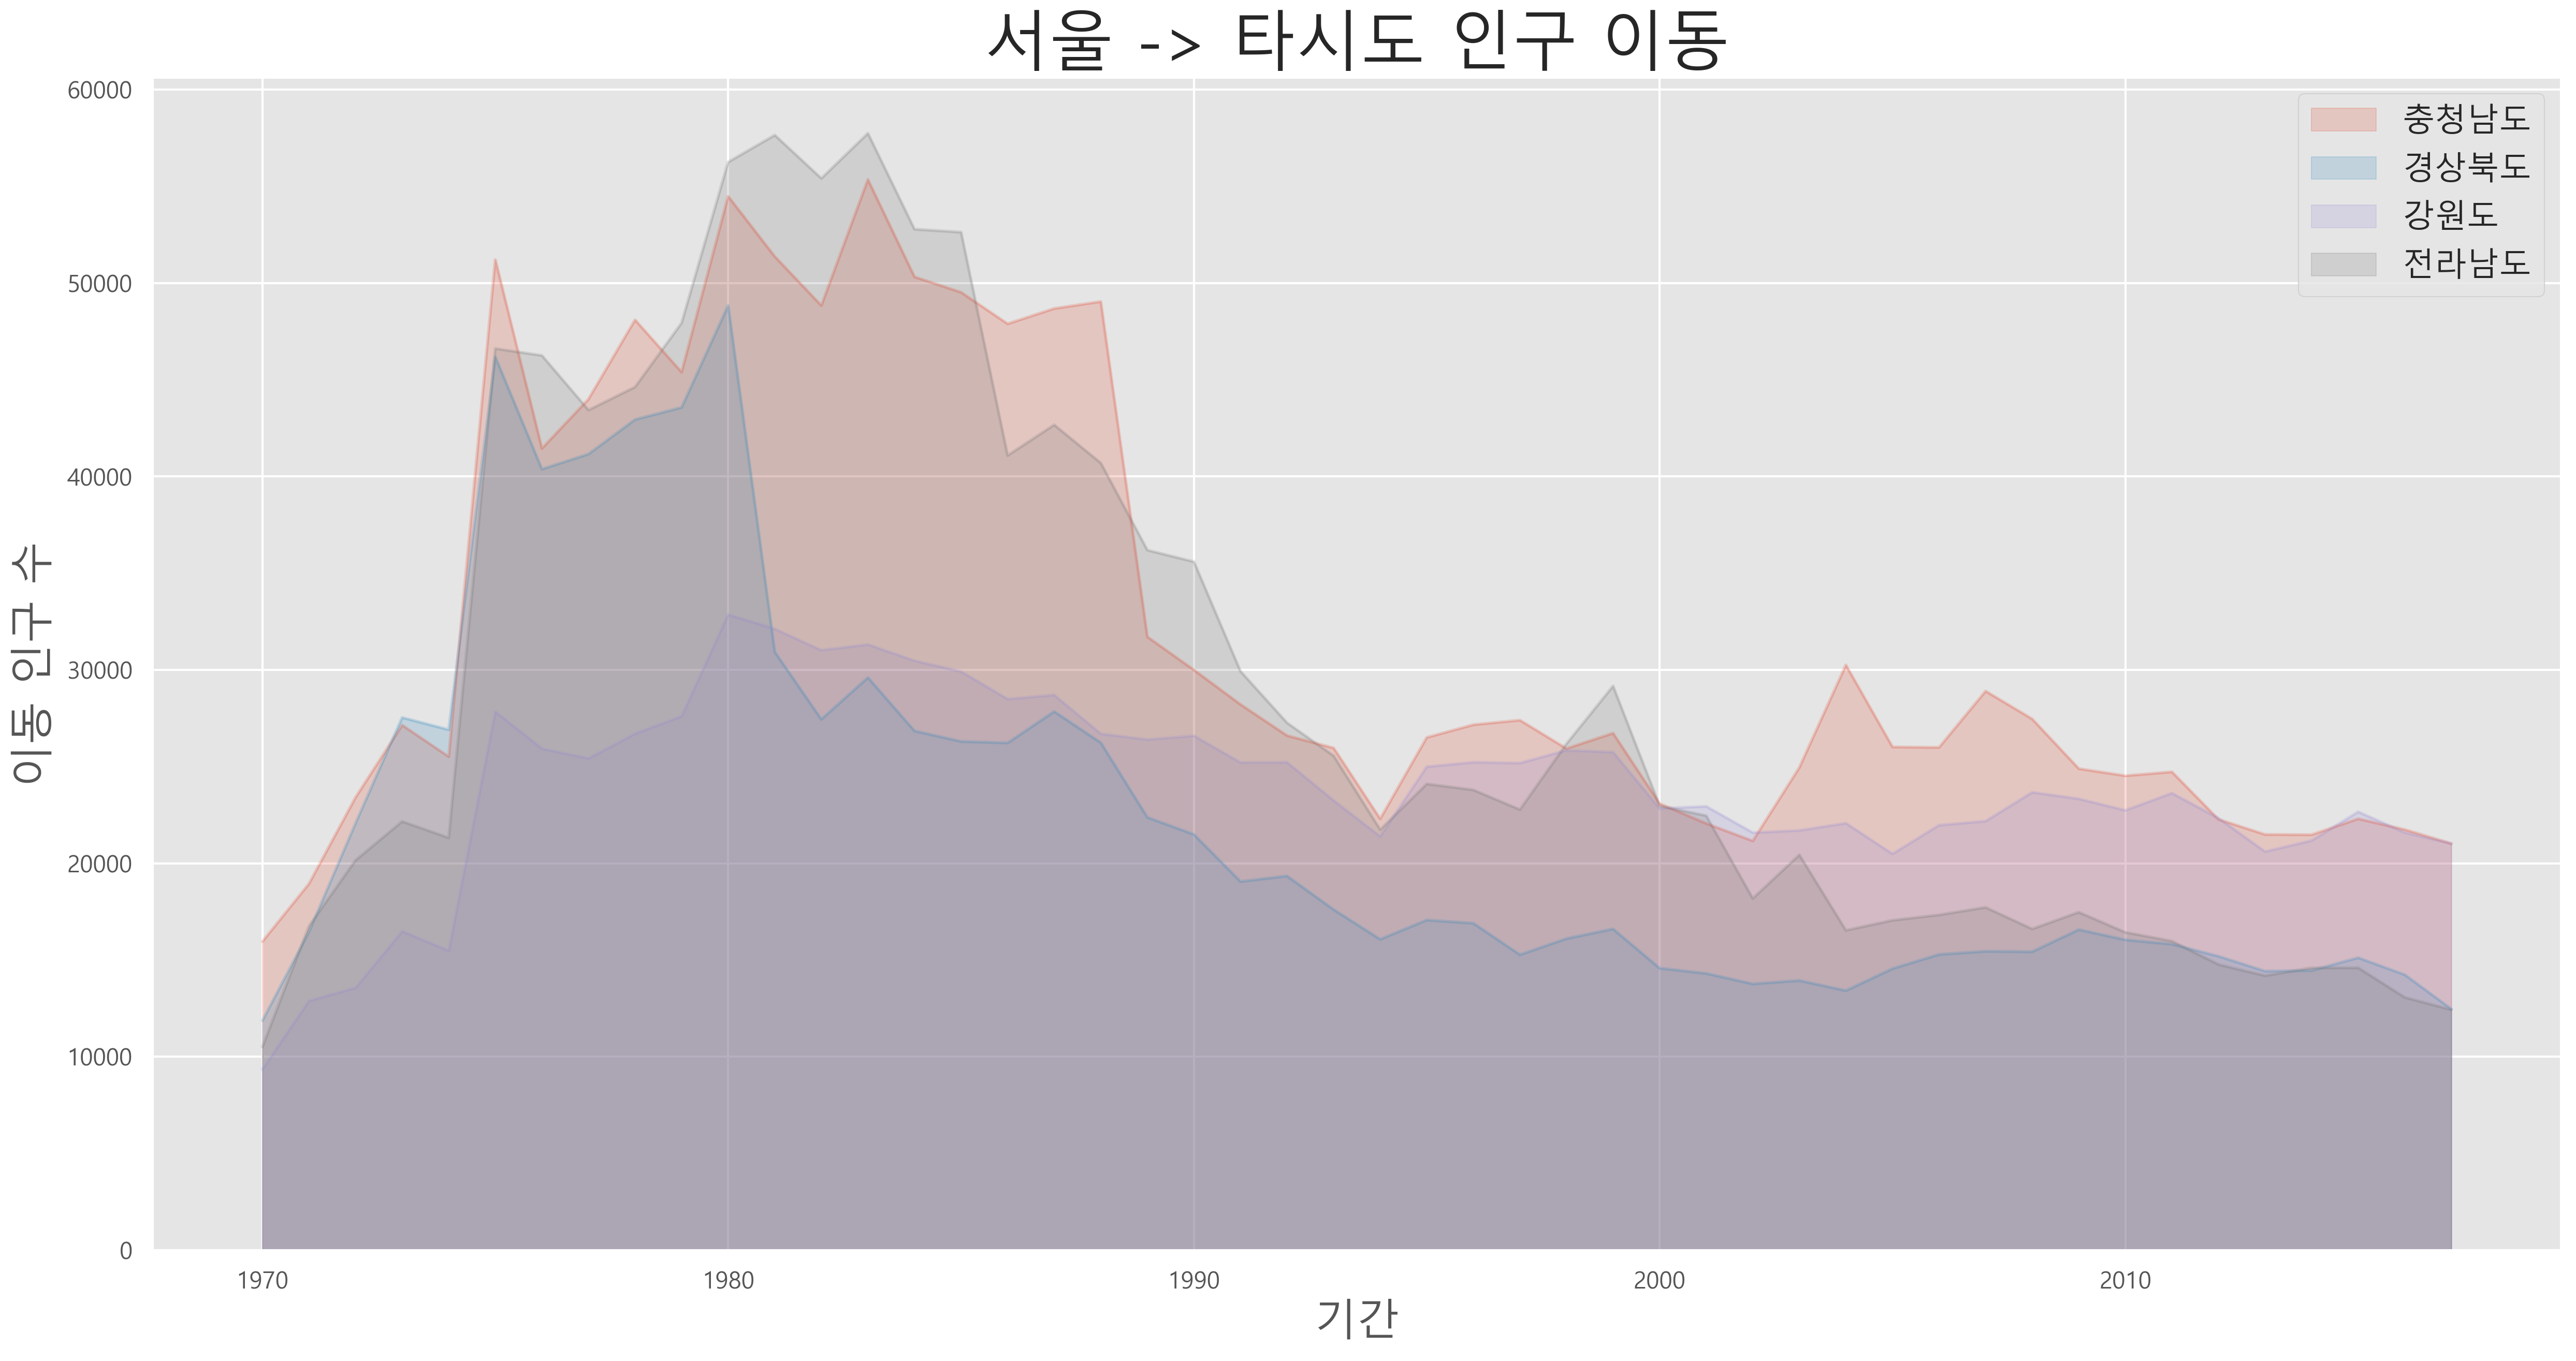

In [15]:
# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20,10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()